## Linear Regression for Diabetes dataset


Import needed libraries

In [2]:
pip install matplotlib numpy scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

Load the diabetes dataset, divided into `X` data and `y` features in a Dataframe format:

- Prompt used in Sapanish for Gemini (inside Google Colab, if you want to keep record of it you need to use it outside via your email account):

"Tú eres un experto en python. Dame el codigo para que al cargar lo siguiente me lo entregue en un dataframe con el nombre original de las columnas (no en arrays): X, y = datasets.load_diabetes(return_X_y=True)"

In [4]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Create a DataFrame with the data
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target variable as a column
df['y'] = diabetes.target

# Print the DataFrame
#print(df)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


- Doc sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes

- TO-DO:
  Explicación de la columnas s1-s6:

  Link: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset



Load the diabetes dataset, divided into `X` data and `y` features (as arrays):

In [5]:
X, y = datasets.load_diabetes(return_X_y=True)
#(X, y) = datasets.load_diabetes(return_X_y=True)
print(X.shape)
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


In [6]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [7]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [8]:
print(y.shape)
print(y[0])

(442,)
151.0


Select just one feature to target for this exercise

In [9]:
# Selecting the 3rd feature
X = X[:, 2]
print(X.shape)
print(X[0])
X

(442,)
0.061696206518683294


array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
       -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
       -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
       -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
       -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
       -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
        0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
       -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
       -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
       -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
       -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
       -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
       -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
       -0.02452876, -0.01806189, -0.01482845, -0.02991782, -0.04

In [10]:
#Reshaping to get a 2D array
X = X.reshape(-1, 1)
print(X.shape)
print(X)

(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 

Split the training and test data for both `X` and `y`

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)
#(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X, y, test_size=0.33)

Select the model and fit it with the training data

In [12]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Use test data to predict a line

In [13]:
y_pred = model.predict(X_test)

# error = y_test - y_pred
# error = y_pred - y_test

- ACLARACIONES SOBRE EL ERROR (diferencia o "residuals"):

```
# error1 = y_pred - y_test
# error2 = y_test - y_pred

# error1 = -error2

# TO-DO: graficar la distribución del error

# error_abs = |y_pred - y_test|
# error_abs = |y_test - y_pred|

# error_sq = (y_pred - y_test)^2
# error_sq = (y_test - y_pred)^2
```



In [14]:
error2 = y_test - y_pred
error2

array([ -61.64649356, -115.10399107,    5.46758897,  -25.9514919 ,
         89.50834038,  105.19983989,   -4.45557775,  -35.14707725,
        -45.22157576,   25.1649254 ,  -49.29957642,    4.85175536,
         93.54675702,    4.43384188,  -87.07024397,   52.70042358,
         57.62242292,  -77.29957642,    8.62125553,   29.01009146,
        -37.07024397,  136.58283889,  -25.64882833,  -41.68257543,
         47.62242292,   15.4734259 ,   45.23942391,   24.16025586,
         28.81684088,   49.54909179,   57.9658379 , -138.7594087 ,
        -66.53241103,   19.42917234, -114.492827  ,  101.46875636,
         16.50600561,  -76.41716111,   17.27784055,  -18.72099207,
        -13.95382667,  114.43033972,  -63.45441036,  -72.34032783,
         59.9320908 ,  -28.95616144,  -63.72099207,   89.58283889,
        -30.87816078,  -94.53124364, -101.41482634,  -60.80249488,
        -44.64766094,  -45.492827  ,  -35.79899273,   84.00892408,
         54.81684088,    4.38958831,  -37.14824464,  -81.64649

(array([ 3.,  4., 10., 22., 29., 20., 24., 19., 11.,  4.]),
 array([-167.33565829, -136.94380857, -106.55195885,  -76.16010914,
         -45.76825942,  -15.3764097 ,   15.01544002,   45.40728974,
          75.79913945,  106.19098917,  136.58283889]),
 <BarContainer object of 10 artists>)

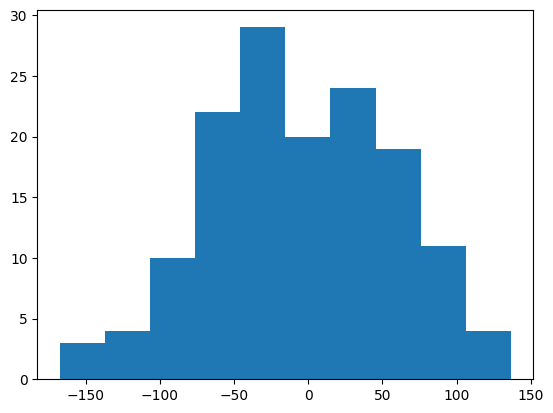

In [15]:
plt.hist(error2)

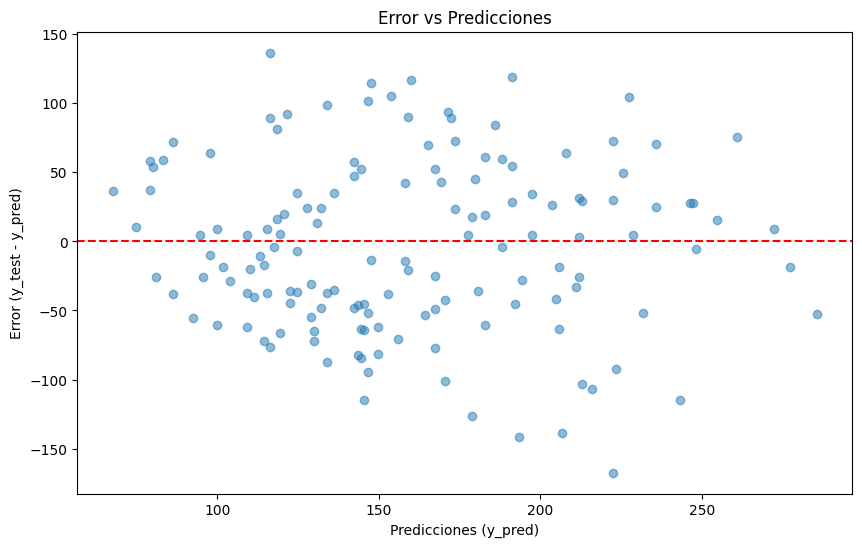

In [17]:
# Crear un gráfico de dispersión de y_pred vs error2
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, error2, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones (y_pred)')
plt.ylabel('Error (y_test - y_pred)')
plt.title('Error vs Predicciones')
plt.show()


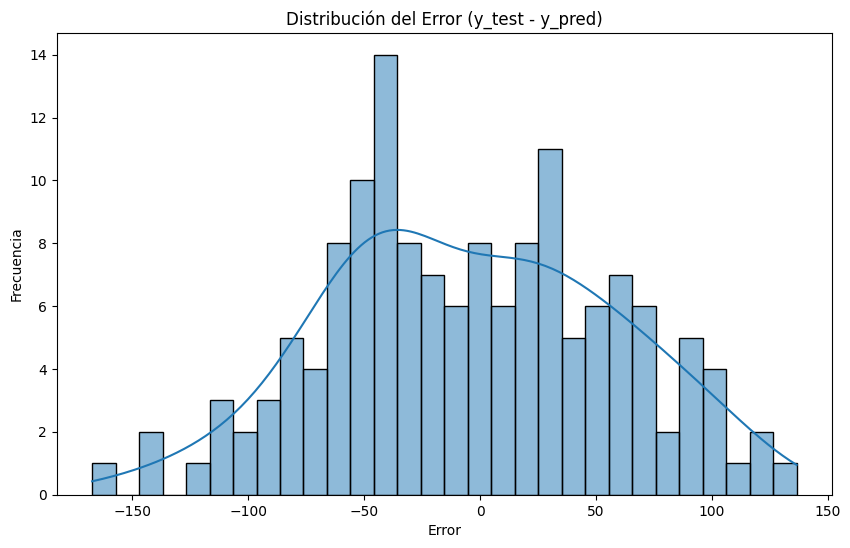

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un histograma de error2
plt.figure(figsize=(10, 6))
sns.histplot(error2, bins=30, kde=True)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución del Error (y_test - y_pred)')
plt.show()


Display the results in a plot

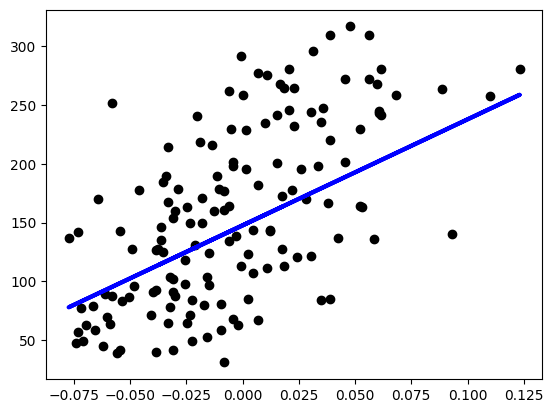

In [ ]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un histograma de error2
plt.figure(figsize=(10, 6))
sns.histplot(error2, bins=30, kde=True)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución del Error (y_test - y_pred)')
plt.show()


NameError: name 'error2' is not defined

<Figure size 1000x600 with 0 Axes>

- TAREA:

Calcular métricas de desempeño del modelo: MSE, RMSE, MAE, r2, entre otros.

                  age       sex       bmi        bp        s1        s2  \
age          1.000000  0.173737  0.185085  0.335428  0.260061  0.219243   
sex          0.173737  1.000000  0.088161  0.241010  0.035277  0.142637   
bmi          0.185085  0.088161  1.000000  0.395411  0.249777  0.261170   
bp           0.335428  0.241010  0.395411  1.000000  0.242464  0.185548   
s1           0.260061  0.035277  0.249777  0.242464  1.000000  0.896663   
s2           0.219243  0.142637  0.261170  0.185548  0.896663  1.000000   
s3          -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455   
s4           0.203841  0.332115  0.413807  0.257650  0.542207  0.659817   
s5           0.270774  0.149916  0.446157  0.393480  0.515503  0.318357   
s6           0.301731  0.208133  0.388680  0.390430  0.325717  0.290600   
progression  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054   

                   s3        s4        s5        s6  progression  
age         -0.075181  0.203841 

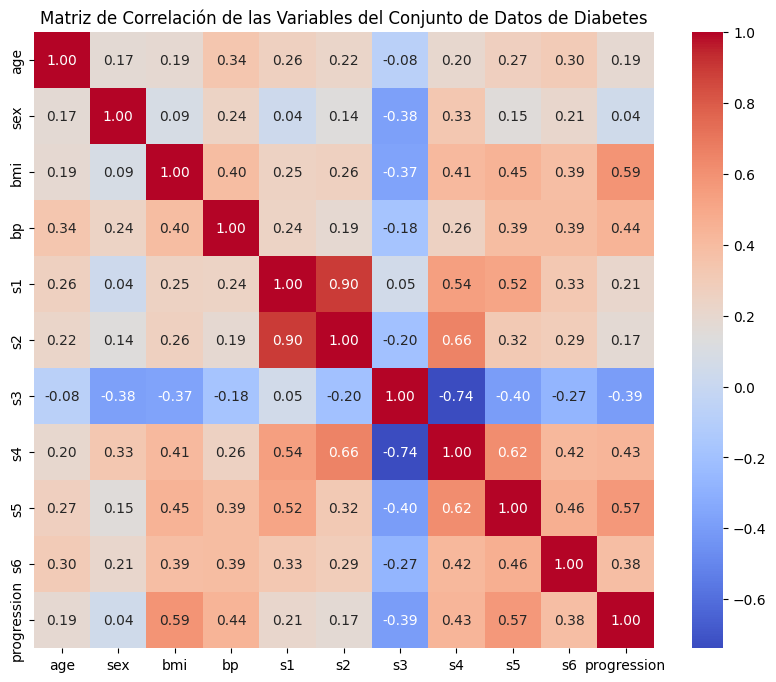

In [8]:
import pandas as pd
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset de diabetes
diabetes = load_diabetes()

# Crear un DataFrame con los datos
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Añadir la variable objetivo al DataFrame
df['progression'] = diabetes.target

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Imprimir la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de las Variables del Conjunto de Datos de Diabetes')
plt.show()


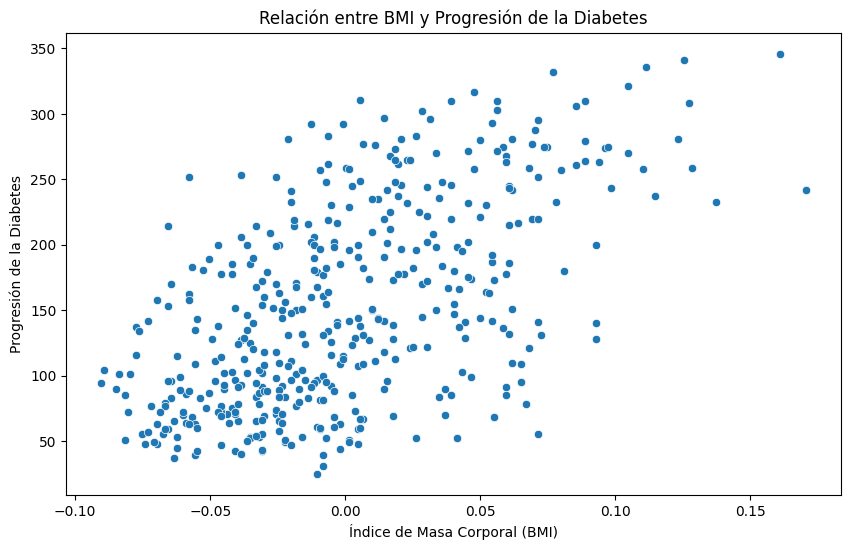

In [9]:
import pandas as pd
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset de diabetes
diabetes = load_diabetes()

# Crear un DataFrame con los datos
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Añadir la variable objetivo al DataFrame
df['progression'] = diabetes.target

# Crear un gráfico de dispersión de BMI vs. Progresión de la Diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='progression', data=df)
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Progresión de la Diabetes')
plt.title('Relación entre BMI y Progresión de la Diabetes')
plt.show()
